In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


# Load the training dataset
train_csv_path = './archive/sign_mnist_train.csv'
data = pd.read_csv(train_csv_path)

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([ 7, 13, 16, ...,  2,  4, 19])

In [4]:
# def init_params():
#     W1 = np.random.rand(10, 784) - 0.5
#     b1 = np.random.rand(10, 1) - 0.5
#     W2 = np.random.rand(10, 10) - 0.5
#     b2 = np.random.rand(10, 1) - 0.5
#     return W1, b1, W2, b2


def init_params():
    # Assuming `hidden_units` is the number of neurons in the hidden layer
    hidden_units = 128  # Example hidden layer size
    input_features = X_train.shape[0]  # Input feature size
    num_classes = 25  # Set this to 25 for alphabets
    
    W1 = np.random.randn(hidden_units, input_features) * 0.01
    b1 = np.zeros((hidden_units, 1))
    W2 = np.random.randn(num_classes, hidden_units) * 0.01  # Change this to 25
    b2 = np.zeros((num_classes, 1))  # Change this to 25
    
    return W1, b1, W2, b2
    

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    # Ensure labels start at 0
    Y = Y - np.min(Y)
    
    # Create one-hot encoded matrix
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    print("one_hot_Y shape:", one_hot_Y.shape)

    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

one_hot_Y shape: (25, 26455)
Iteration:  0
[16 16 16 ... 16 16 16] [ 7 13 16 ...  2  4 19]
0.04449064449064449
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
Iteration:  10
[20 13 20 ... 20 13 20] [ 7 13 16 ...  2  4 19]
0.052995652995652995
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
Iteration:  20
[17 17 17 ... 17 17 17] [ 7 13 16 ...  2  4 19]
0.047023247023247026
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 26455)
one_hot_Y shape: (25, 264

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  7


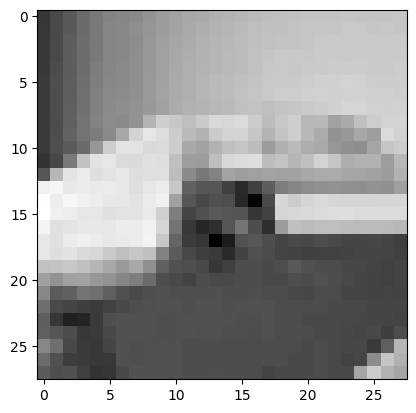

Prediction:  [13]
Label:  13


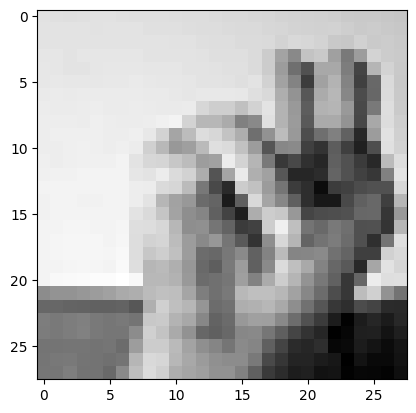

Prediction:  [16]
Label:  16


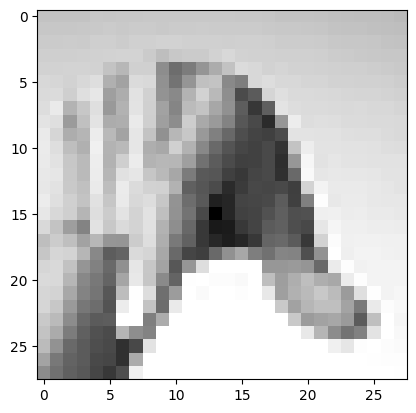

Prediction:  [23]
Label:  23


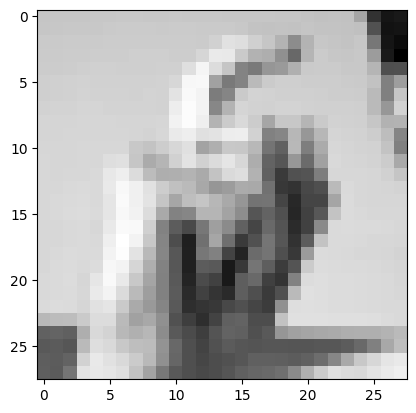

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[ 3  0 24 19  0  8  8 24 14  0 19  6  0 14  4  8  0 10  2 23 10 15  3  8
  6  7  8  8  8 13 23 24 23 18  8 11  0 13 13 23  7  7 18 18 24  7 17  4
 10  2 24 18  2 19 11 15 13 16 10 19  0  7 18 14 18  7 18  8 15 18 22 18
  2  0  3  6 19  2  2 18 19  0  6  4 15  0 17 18 13  8 22  0  4 19 18 24
  0 14  1  2  1 23 15 14  8 18 16 12  8  6 16 19 14  7 13 17  7  5 16 18
 24 18 18  8 20  8 11  4  0 13  4 13 15  7  8 16 10 16  3 14 24 16 24  7
 14  0 24 14  8  4  5  2 15 16  0 15 10 24 15 15 24 18  4 19  0 19  7  2
  6 13 14 24 16  0 16  2 24 10 15 19  0 13 15 18 15 16 18 10  7  4  8 15
  0 15  8  2  8  8 13  0 13 24 16  4 10 13  4  0  8  8  7  5 24 14 24  8
 14  8  0 19  8 18  8  7  4  0  7 18  8  7 10  8 24 24  8  3 16  5 24  5
 24 10  0  7 19 16 24 12  0 10 24 12 13 24  1 18  6 10  0 19 20  0 13  6
 15  8 16 13  8  7 14  8 24 24  8  8 10  0 10 18 16 23  6 24 14 24 14  0
  7 24 10 24 15  8  7  4 19 19  8  7  5 10  0 12 24 19 17 24 24  7  0  2
  2  8  2 19  8 19 24 23 13  7  2  0 23 21  3  6 24

0.413